# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from pprint import pprint

# Import API key
from api_keys import api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)


602

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
# Save config information.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={api_key}&units={units}&q="

# Lists to hold collected info
city_name = []
cloudiness = []
country = []
date = []
humidity = []
lat = []
lng = []
max_temp = []
wind_speed = []


# Sets up print record and collects data for each city
city_number = 1

print(f"Beginning Data Retrieval")
print(f"-----------------------------")

for city in cities:
    try: 
        response = requests.get(query_url + city).json() 
        city_name.append(response["name"])
        cloudiness.append(response["clouds"]["all"])
        country.append(response["sys"]["country"])
        date.append(response["dt"])
        humidity.append(response["main"]["humidity"])
        lat.append(response["coord"]["lat"])
        lng.append(response["coord"]["lon"])
        max_temp.append(response["main"]["temp_max"])
        wind_speed.append(response["wind"]["speed"])
        current_city = response["name"]
        print(f"Processing Record {city_number} | {current_city}")
        city_number += 1
              
    except:
        print("City not found. Skipping...")
              
    continue

print(f"-----------------------------")
print(f"Data Retrieval Complete")
print(f"-----------------------------")


Beginning Data Retrieval
-----------------------------
Processing Record 1 | Butaritari
Processing Record 2 | Port Alfred
Processing Record 3 | Marsa Matruh
Processing Record 4 | Hithadhoo
Processing Record 5 | Beni
Processing Record 6 | Bredasdorp
Processing Record 7 | Cidreira
Processing Record 8 | Punta Arenas
Processing Record 9 | Albany
Processing Record 10 | Georgetown
Processing Record 11 | Victoria
Processing Record 12 | Hasaki
Processing Record 13 | Matara
Processing Record 14 | Letlhakane
Processing Record 15 | New Norfolk
City not found. Skipping...
Processing Record 16 | Ostrovnoy
Processing Record 17 | Tasiilaq
Processing Record 18 | Hermanus
Processing Record 19 | Dikson
Processing Record 20 | Padang
Processing Record 21 | Rikitea
Processing Record 22 | Upernavik
Processing Record 23 | Aldan
Processing Record 24 | Ushuaia
Processing Record 25 | Cramlington
Processing Record 26 | Vaini
Processing Record 27 | Tiksi
Processing Record 28 | Jamestown
Processing Record 29 | Imb

Processing Record 224 | Nuuk
City not found. Skipping...
Processing Record 225 | Nanakuli
Processing Record 226 | Grand Gaube
Processing Record 227 | Nichinan
City not found. Skipping...
Processing Record 228 | Teguise
Processing Record 229 | Veraval
City not found. Skipping...
City not found. Skipping...
Processing Record 230 | Natal
City not found. Skipping...
Processing Record 231 | Vangaindrano
Processing Record 232 | Matagami
Processing Record 233 | Shache
Processing Record 234 | Tiznit
Processing Record 235 | Northam
Processing Record 236 | Pyinmana
Processing Record 237 | Ortakoy
Processing Record 238 | Broken Hill
Processing Record 239 | Batagay-Alyta
Processing Record 240 | Lebu
Processing Record 241 | Vestmannaeyjar
Processing Record 242 | Sola
Processing Record 243 | Wasilla
Processing Record 244 | Margate
City not found. Skipping...
Processing Record 245 | Tecoanapa
Processing Record 246 | Khatanga
City not found. Skipping...
City not found. Skipping...
Processing Record 24

Processing Record 452 | Sovetskiy
City not found. Skipping...
Processing Record 453 | Mahanoro
Processing Record 454 | Port Macquarie
City not found. Skipping...
Processing Record 455 | Xai-Xai
City not found. Skipping...
Processing Record 456 | Phek
City not found. Skipping...
Processing Record 457 | Jefferson City
Processing Record 458 | Takoradi
Processing Record 459 | Dwarka
Processing Record 460 | Sandwick
City not found. Skipping...
Processing Record 461 | Pervomayskoye
Processing Record 462 | Humaita
Processing Record 463 | Zunyi
Processing Record 464 | Noyabrsk
Processing Record 465 | Valasske Klobouky
Processing Record 466 | Bubaque
Processing Record 467 | Chapadinha
City not found. Skipping...
Processing Record 468 | Juegang
Processing Record 469 | Wheeling
Processing Record 470 | Atambua
Processing Record 471 | Saint-Augustin
Processing Record 472 | Yerofey Pavlovich
Processing Record 473 | Anloga
Processing Record 474 | Edgewood
City not found. Skipping...
Processing Record

# Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [5]:
city_data_dictionary = {
    "City": city_name,
    "Cloudiness": cloudiness,
    "Country": country,
    "Date": date,
    "Humidity": humidity,
    "Lat": lat,
    "Lng": lng,
    "Max Temp": max_temp,
    "Wind Speed": wind_speed
}

city_data = pd.DataFrame(city_data_dictionary)

# Make sure no missing values
print(city_data.count())

City          530
Cloudiness    530
Country       530
Date          530
Humidity      530
Lat           530
Lng           530
Max Temp      530
Wind Speed    530
dtype: int64


In [6]:
# Display data frame
display(city_data.head())

,City,Cloudiness,Country,Date,Humidity,Lat,Lng,Max Temp,Wind Speed
0,Butaritari,100,KI,1561334342,81,3.07,172.79,81.07,2.28
1,Port Alfred,0,ZA,1561334344,90,-33.59,26.89,55.99,3.00
2,Marsa Matruh,0,EG,1561334345,88,31.35,27.25,77.00,10.29
3,Hithadhoo,9,MV,1561334346,70,-0.60,73.08,83.88,8.63
4,Beni,97,CD,1561334346,96,0.49,29.47,66.04,2.24


In [7]:
# Save Data to csv
city_data.to_csv("city_data.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

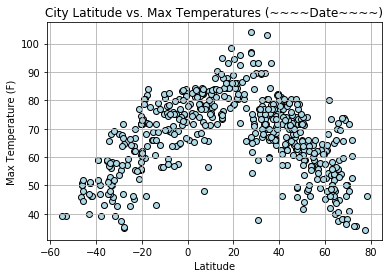

In [26]:
x_axis = lat
y_axis = max_temp
lat_vs_temp = plt.scatter(x_axis, y_axis, marker = "o", facecolors = "lightblue", edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.title(f"City Latitude vs. Max Temperatures (~~~~Date~~~~)")
plt.grid()

# display(lat_vs_temp)

plt.savefig('lat-vs-temp.png')

#### Latitude vs. Humidity Plot

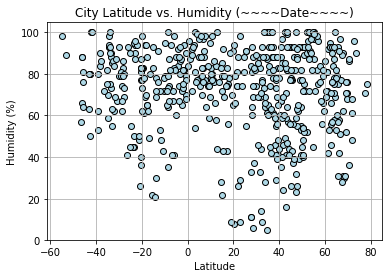

In [25]:
x_axis = lat
y_axis = humidity
lat_vs_humidity = plt.scatter(x_axis, y_axis, marker = "o", facecolors = "lightblue", edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title(f"City Latitude vs. Humidity (~~~~Date~~~~)")
plt.grid()

# display(lat_vs_humidity)

plt.savefig('lat-vs-humidity.png')

#### Latitude vs. Cloudiness Plot

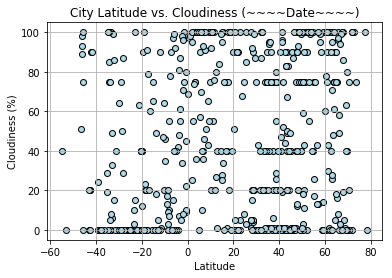

In [27]:
x_axis = lat
y_axis = cloudiness
lat_vs_cloudiness = plt.scatter(x_axis, y_axis, marker = "o", facecolors = "lightblue", edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.title(f"City Latitude vs. Cloudiness (~~~~Date~~~~)")
plt.grid()

# display(lat_vs_cloudiness)

plt.savefig('lat-vs-cloudiness.png')

#### Latitude vs. Wind Speed Plot

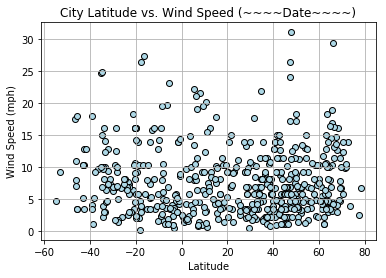

In [29]:
x_axis = lat
y_axis = wind_speed
lat_vs_wind = plt.scatter(x_axis, y_axis, marker = "o", facecolors = "lightblue", edgecolors = "black")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (mph)")
plt.title(f"City Latitude vs. Wind Speed (~~~~Date~~~~)")
plt.grid()

# display(lat_vs_temp)

plt.savefig('lat-vs-wind.png')